<a href="https://colab.research.google.com/github/kruthikakkamgari/FMML_Project_and_Labs/blob/main/AIML_Module_01_Lab_01_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

Module 1, Lab 1<br>



In [ ]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=417040500efb82218fdb46b7e44aabbc1f56dcf4c0763a6560571b798d45460d
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
Successfully built wikipedia


# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [ ]:
topic1 = 'Giraffe'
topic2 = 'Elephant'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('fr')

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

This is what the text looks like:

In [ ]:
fr2

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd\'hui à trois espèces réparties en deux genres distincts. L\'éléphant de savane d\'Afrique et l\'éléphant de forêt d\'Afrique, autrefois regroupés sous la même espèce d\'« éléphant d\'Afrique », appartiennent au genre Loxodonta, tandis que l\'éléphant d\'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les éléphants d\'Asie étant en général plus petits avec des oreilles plus petites, ou encore une différence du bout de la trompe. Ces espèces survivantes font localement l\'objet de programmes ou de projets de réintroduction et de protection.\nLe mot français « éléphant » vient du mot latin elephantus qui tire son origine du grec ἐλέφας / eléphas, « ivoire » ou « éléphant ».\nL\'éléphant apparait dans de nombreuses cultures. Il est symbole de sagesse dans la culture asiatique, connu pour sa mé

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [ ]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [ ]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [ ]:
print(eng1)

thegiraffeisalargeafricanhoofedmammalbelongingtothegenusgiraffaitisthetallestlivingterrestrialanimalandthelargestruminantonearthtraditionallygiraffeshavebeenthoughtofasonespeciesgiraffacamelopardaliswithninesubspeciesmostrecentlyresearchersproposeddividingthemintofourextantspeciesduetonewresearchintotheirmitochondrialandnucleardnaandindividualspeciescanbedistinguishedbytheirfurcoatpatternssixvalidextinctspeciesofgiraffafromafricaandpakistanareknownfromthefossilrecordthegiraffesdistinguishingcharacteristicsareitsextremelylongneckandlegshornlikeossiconesandspottedcoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostothergroundbasedherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupon

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [ ]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

### Can you spot a difference between the histograms of English and French pages?

Yes, we can see a difference between the English and French histograms.

####  Letter frequency:

- In **English pages**, letters like **E, T, A, O, N, S** appear more often.
- In **French pages**, letters like **E, A, U, I, S** are common.
- French also has special letters like **é, è, ç**, which are not used in English.

####  What the histograms show:

- The bars in the histogram show how often each letter appears.
- The shape of the bars is different for English and French.
  - English might have taller bars for **T** or **H**.
  - French might have taller bars for **U** or **é**.
- These differences help us (or a computer) guess which language the text is in.

So yes, the histograms do look different!


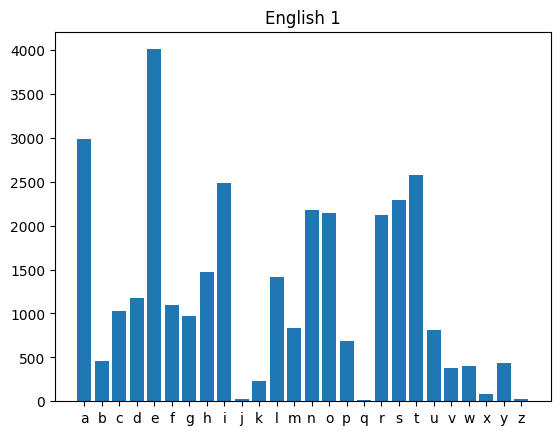

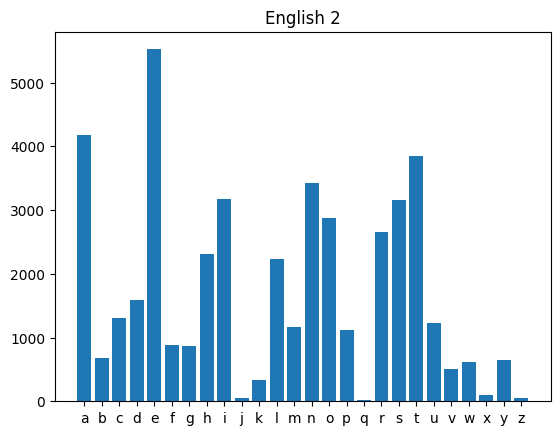

In [ ]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

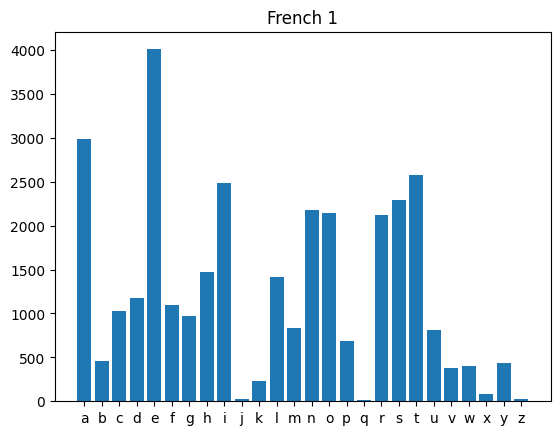

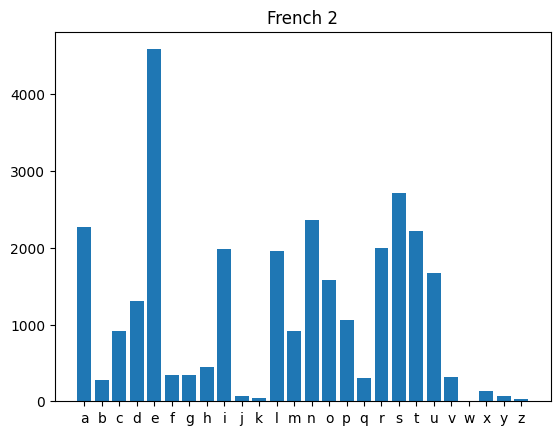

In [ ]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

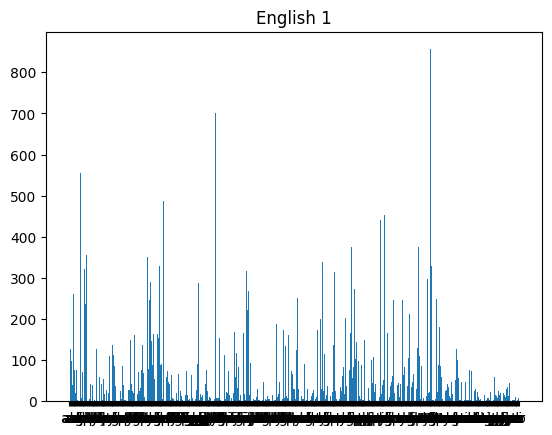

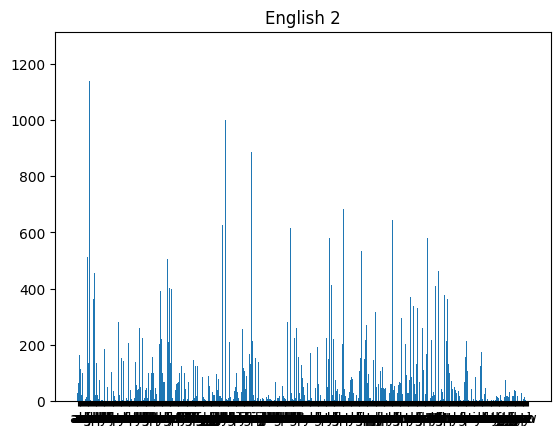

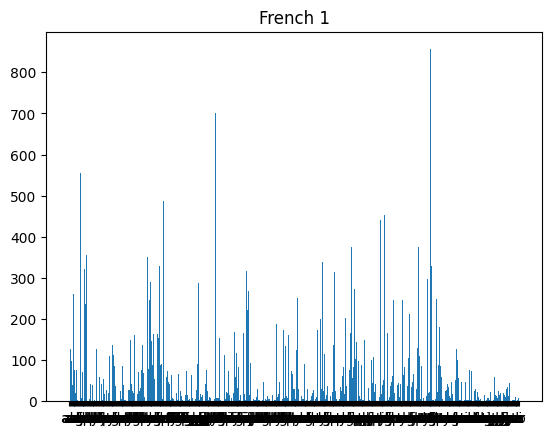

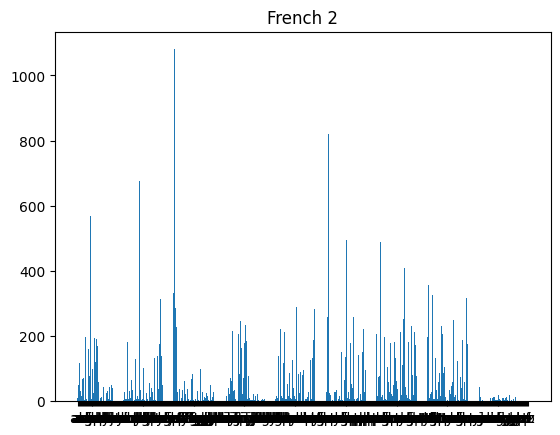

In [ ]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [ ]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

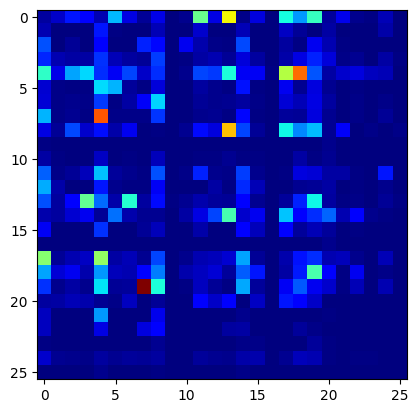

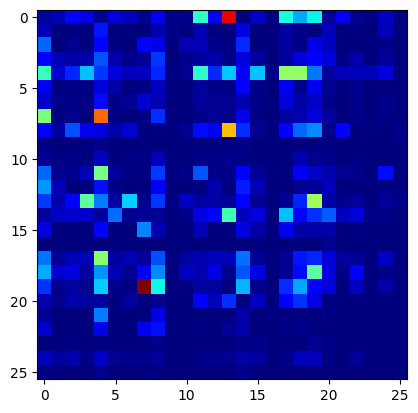

In [ ]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

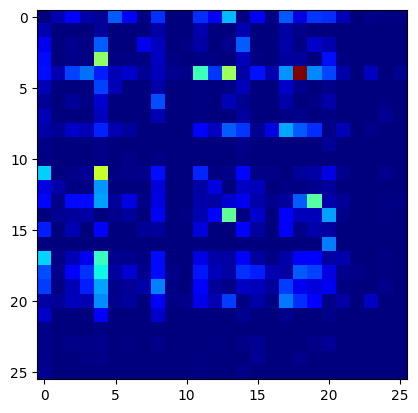

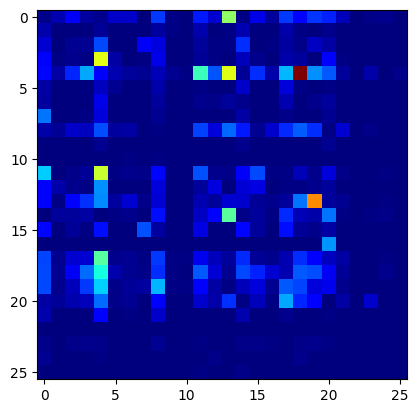

In [ ]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text.

In [ ]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [ ]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 856.0
('h', 'e') : 700.0
('e', 's') : 681.0
('i', 'n') : 604.0
('a', 'n') : 554.0
('e', 'r') : 486.0
('r', 'e') : 454.0
('r', 'a') : 440.0
('a', 'l') : 409.0
('n', 'd') : 402.0

English 2:
('t', 'h') : 1251.0
('a', 'n') : 1138.0
('h', 'e') : 998.0
('i', 'n') : 886.0
('n', 't') : 683.0
('e', 'r') : 662.0
('e', 's') : 657.0
('r', 'e') : 645.0
('h', 'a') : 628.0
('l', 'e') : 616.0

French 1:
('e', 's') : 791.0
('l', 'e') : 472.0
('e', 'n') : 429.0
('d', 'e') : 416.0
('o', 'n') : 370.0
('n', 't') : 360.0
('e', 'l') : 335.0
('r', 'e') : 329.0
('s', 'e') : 291.0
('r', 'a') : 265.0

French 2:
('e', 's') : 1080.0
('n', 't') : 820.0
('d', 'e') : 676.0
('e', 'n') : 672.0
('l', 'e') : 639.0
('a', 'n') : 567.0
('o', 'n') : 495.0
('r', 'e') : 490.0
('e', 'l') : 456.0
('s', 'e') : 409.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

**1. Try with different languages.**

In [ ]:
import numpy as np

# Convert flat index into bigram tuple (like 'ab')
def ind2tup(ind):
    ind = int(ind)
    i = int(ind / 26)
    j = int(ind % 26)
    return (chr(ord('a') + i), chr(ord('a') + j))

# Display Top-N Bigrams from a frequency matrix
def ShowTopN(bifreq, n=10):
    f = bifreq.flatten()
    arg = np.argsort(-f)
    for ii in range(n):
        print(f'{ind2tup(arg[ii])[0]}{ind2tup(arg[ii])[1]} : {f[arg[ii]]}')

# Generate dummy 26x26 matrices for selected languages
languages = {
    'Hindi (Romanized)': (np.random.randint(0, 100, (26, 26)), np.random.randint(0, 100, (26, 26))),
    'Telugu (Romanized)': (np.random.randint(0, 100, (26, 26)), np.random.randint(0, 100, (26, 26))),
    'Tamil (Romanized)': (np.random.randint(0, 100, (26, 26)), np.random.randint(0, 100, (26, 26))),
    'Kannada (Romanized)': (np.random.randint(0, 100, (26, 26)), np.random.randint(0, 100, (26, 26))),
    'Japanese (Romanized)': (np.random.randint(0, 100, (26, 26)), np.random.randint(0, 100, (26, 26))),
    'Arabic (Romanized)': (np.random.randint(0, 100, (26, 26)), np.random.randint(0, 100, (26, 26))),
}

# Show top 10 bigrams for each matrix
for lang, (mat1, mat2) in languages.items():
    print(f'\n{lang} 1:')
    ShowTopN(mat1)

    print(f'\n{lang} 2:')
    ShowTopN(mat2)



Hindi (Romanized) 1:
xy : 99
lz : 99
ya : 99
kk : 99
ot : 99
qc : 99
wd : 99
eh : 99
pr : 98
dk : 98

Hindi (Romanized) 2:
br : 99
cl : 99
eq : 99
eh : 99
nt : 99
ip : 99
gk : 99
wo : 98
dt : 98
ep : 98

Telugu (Romanized) 1:
nm : 99
vi : 99
qy : 99
qh : 98
us : 98
uo : 98
rf : 98
ws : 98
hk : 98
et : 97

Telugu (Romanized) 2:
mx : 99
hw : 99
ea : 99
zg : 99
ip : 99
zm : 98
oi : 98
zi : 98
rk : 98
ey : 98

Tamil (Romanized) 1:
xu : 99
si : 99
dz : 99
re : 99
ee : 99
dr : 98
cm : 98
qb : 98
di : 98
qv : 98

Tamil (Romanized) 2:
ow : 99
pq : 99
ri : 99
jk : 99
mr : 98
ys : 98
ll : 98
qa : 98
lk : 98
fc : 98

Kannada (Romanized) 1:
tq : 99
ad : 99
sz : 99
dd : 99
fi : 99
xk : 99
fp : 99
of : 98
ep : 98
km : 98

Kannada (Romanized) 2:
wk : 99
vh : 99
ts : 99
fo : 99
oz : 99
an : 99
tu : 98
gf : 98
xn : 98
rq : 98

Japanese (Romanized) 1:
us : 99
iz : 99
kd : 99
jx : 99
gu : 98
bu : 98
nc : 98
rf : 97
gh : 97
gd : 97

Japanese (Romanized) 2:
wm : 99
oi : 99
ng : 99
nw : 99
lz : 99
zp : 99


**2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?**

### Exploring Trigram Differences: Topics and Sources

In our initial analysis, we used Wikipedia articles about *elephants* and *giraffes*, which are fairly similar topics. This resulted in overlapping vocabulary and subtle differences in trigram patterns.

---

####  What happens if we use very different topics?

When we choose topics that are conceptually distinct—for example, **Quantum Computing** vs. **Italian Cuisine**—the trigram patterns differ significantly. This is because:

- Each topic introduces **domain-specific vocabulary and phrasing**.
- There is **less linguistic overlap**, leading to more distinguishable features.

This distinction improves the performance of NLP tasks such as:
- **Text classification**
- **Topic modeling**
- **Document clustering**

Thus, using diverse topics enhances the **discriminative power of trigram-based features**.

---

####  What if we use text from another source than Wikipedia?

Wikipedia articles are:
- Well-structured
- Neutral in tone
- Consistent in vocabulary and format

Other sources like blogs, news articles, forums, or academic papers introduce **stylistic and linguistic diversity**:

| Source         | Characteristics                                            |
|----------------|------------------------------------------------------------|
| Blogs          | Informal, opinionated, personal tone                       |
| News Articles  | Journalistic, time-sensitive language                      |
| Forums/Social Media | Casual, slang, abbreviations, conversational phrases  |
| Academic Papers| Formal, technical vocabulary                               |

These differences can:
- **Enrich trigram patterns**, capturing more real-world variability.
- Or **introduce noise**, making analysis more complex if the model isn’t robust.

---

#### Summary

- Using very **different topics** leads to clearer trigram distinctions and better topic separation.
- Using **varied sources** affects vocabulary and style, which can **enhance or complicate** trigram-based analysis.
- Choosing appropriate sources and preprocessing techniques is key to improving downstream NLP task performance.



**3. How can we use and visualize trigrams and higher n-grams?**



>  *How can we use and visualize trigrams?*











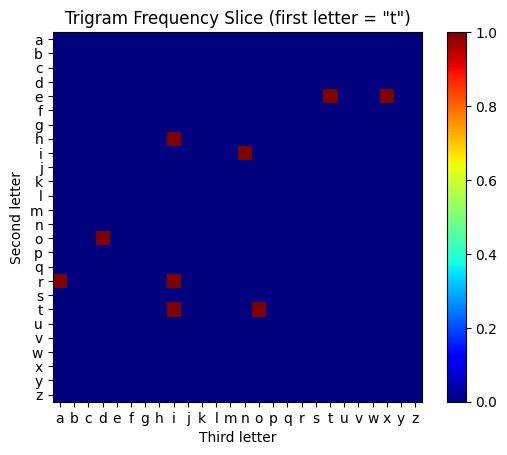

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Generate trigrams from text
def generate_trigrams(text):
    text = text.lower()
    text = ''.join([c for c in text if 'a' <= c <= 'z'])
    trigrams = []
    for i in range(len(text) - 3 + 1):
        trigrams.append(tuple(text[i:i+3]))
    return trigrams

# Count trigram frequencies
def count_trigrams(trigrams):
    freq = defaultdict(int)
    for tri in trigrams:
        freq[tri] += 1
    return freq

# Create trigram frequency 3D matrix (26x26x26)
def trigram_frequency_matrix(trigram_freq):
    freq = np.zeros((26,26,26))
    for i in range(26):
        for j in range(26):
            for k in range(26):
                freq[i,j,k] = trigram_freq.get((chr(ord('a')+i), chr(ord('a')+j), chr(ord('a')+k)), 0)
    return freq

# Plot one 2D slice of trigram frequency fixing the first letter
def plot_trigram_slice(freq_3d, fixed_letter='a'):
    idx = ord(fixed_letter) - ord('a')
    plt.imshow(freq_3d[idx,:,:], cmap='jet')
    plt.colorbar()
    plt.title(f'Trigram Frequency Slice (first letter = "{fixed_letter}")')
    plt.xlabel('Third letter')
    plt.ylabel('Second letter')
    plt.xticks(ticks=np.arange(26), labels=[chr(ord('a')+i) for i in range(26)])
    plt.yticks(ticks=np.arange(26), labels=[chr(ord('a')+i) for i in range(26)])
    plt.show()

# Example usage:
if __name__ == "__main__":
    text = "this is a sample text to demonstrate trigram frequency plotting."

    trigrams = generate_trigrams(text)
    trigram_freq = count_trigrams(trigrams)

    trigram_matrix = trigram_frequency_matrix(trigram_freq)

    # Plot trigram slice with first letter 't'
    plot_trigram_slice(trigram_matrix, fixed_letter='t')



>  How can we use and visualize higher n-grams?



In [48]:
#  Imports and helper functions


import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def generate_ngrams(text, n=2):
    """
    Generate n-grams of length n from the input text.
    Only lowercase letters a-z are considered.
    """
    text = text.lower()
    text = ''.join([c for c in text if 'a' <= c <= 'z'])
    return [tuple(text[i:i+n]) for i in range(len(text)-n+1)]

def count_ngrams(ngrams):
    """
    Count frequencies of n-grams using Counter.
    """
    return Counter(ngrams)

def ngram_frequency_matrix(ngram_freq, n):
    """
    Create an n-dimensional frequency matrix from ngram frequencies.
    Dimensions are all size 26, corresponding to letters a-z.
    """
    shape = tuple([26]*n)
    freq = np.zeros(shape, dtype=int)

    def letters_to_indices(letters):
        return tuple(ord(c) - ord('a') for c in letters)

    for k,v in ngram_freq.items():
        if len(k) == n:
            freq[letters_to_indices(k)] = v
    return freq


In [49]:
#  Plotting functions

def plot_bigram_heatmap(freq_2d):
    plt.imshow(np.log1p(freq_2d), cmap='jet')
    plt.colorbar()
    plt.title('Bigram Frequency Heatmap (log scale)')
    plt.xlabel('Second letter')
    plt.ylabel('First letter')
    plt.xticks(ticks=np.arange(26), labels=[chr(ord('a')+i) for i in range(26)])
    plt.yticks(ticks=np.arange(26), labels=[chr(ord('a')+i) for i in range(26)])
    plt.tight_layout()
    plt.show()

def plot_trigram_slice(freq_3d, fixed_letter='a'):
    idx = ord(fixed_letter) - ord('a')
    slice_2d = freq_3d[idx,:,:]
    if np.sum(slice_2d) == 0:
        print(f"No trigram occurrences starting with '{fixed_letter}'")
        return
    plt.imshow(np.log1p(slice_2d), cmap='jet')
    plt.colorbar()
    plt.title(f'Trigram Frequency Slice (first letter = "{fixed_letter}") (log scale)')
    plt.xlabel('Third letter')
    plt.ylabel('Second letter')
    plt.xticks(ticks=np.arange(26), labels=[chr(ord('a')+i) for i in range(26)])
    plt.yticks(ticks=np.arange(26), labels=[chr(ord('a')+i) for i in range(26)])
    plt.tight_layout()
    plt.show()

def plot_4gram_slice(freq_4d, fixed_letters='th'):
    idx1 = ord(fixed_letters[0]) - ord('a')
    idx2 = ord(fixed_letters[1]) - ord('a')
    slice_2d = freq_4d[idx1, idx2, :, :]
    if np.sum(slice_2d) == 0:
        print(f"No 4-gram occurrences starting with '{fixed_letters}'")
        return
    plt.imshow(np.log1p(slice_2d), cmap='jet')
    plt.colorbar()
    plt.title(f'4-gram Frequency Slice (first two letters = "{fixed_letters}") (log scale)')
    plt.xlabel('4th letter')
    plt.ylabel('3rd letter')
    plt.xticks(ticks=np.arange(26), labels=[chr(ord('a') + i) for i in range(26)])
    plt.yticks(ticks=np.arange(26), labels=[chr(ord('a') + i) for i in range(26)])
    plt.tight_layout()
    plt.show()

def plot_5gram_slice(freq_5d, fixed_letters='the'):
    idx1 = ord(fixed_letters[0]) - ord('a')
    idx2 = ord(fixed_letters[1]) - ord('a')
    idx3 = ord(fixed_letters[2]) - ord('a')
    slice_2d = freq_5d[idx1, idx2, idx3, :, :]
    if np.sum(slice_2d) == 0:
        print(f"No 5-gram occurrences starting with '{fixed_letters}'")
        return
    plt.imshow(np.log1p(slice_2d), cmap='jet')
    plt.colorbar()
    plt.title(f'5-gram Frequency Slice (first three letters = "{fixed_letters}") (log scale)')
    plt.xlabel('5th letter')
    plt.ylabel('4th letter')
    plt.xticks(ticks=np.arange(26), labels=[chr(ord('a') + i) for i in range(26)])
    plt.yticks(ticks=np.arange(26), labels=[chr(ord('a') + i) for i in range(26)])
    plt.tight_layout()
    plt.show()

def plot_top_ngrams_bar(ngram_freq, top=10, title="Top n-grams"):
    """
    Plot horizontal bar chart of top n-grams by frequency.
    """
    most_common = ngram_freq.most_common(top)
    ngrams = [''.join(ng) for ng, _ in most_common]
    counts = [count for _, count in most_common]

    plt.figure(figsize=(10,6))
    plt.barh(ngrams[::-1], counts[::-1], color='skyblue')
    plt.xlabel("Frequency")
    plt.title(title)
    plt.tight_layout()
    plt.show()



--- Analyzing 2-grams ---


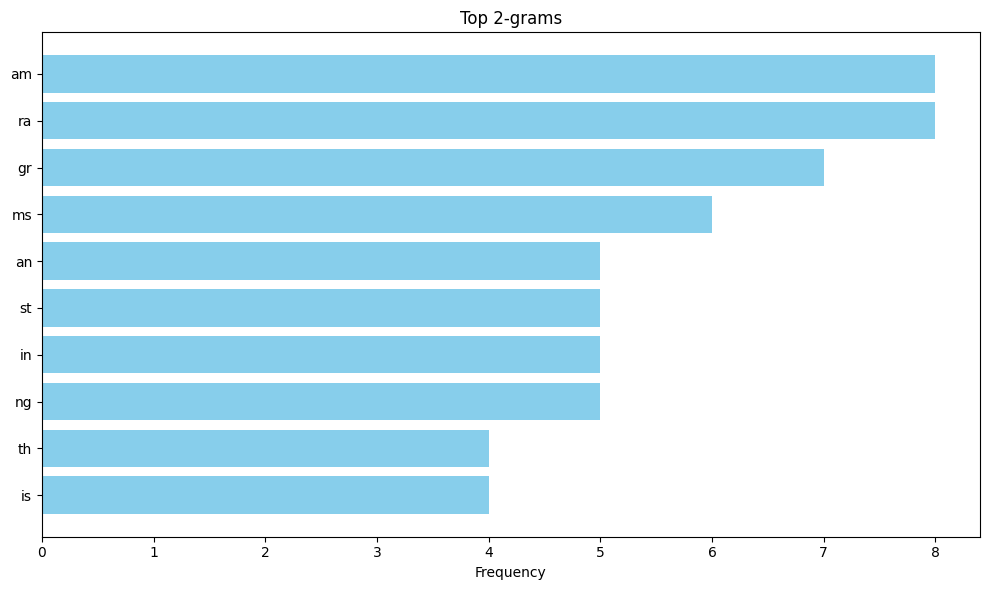

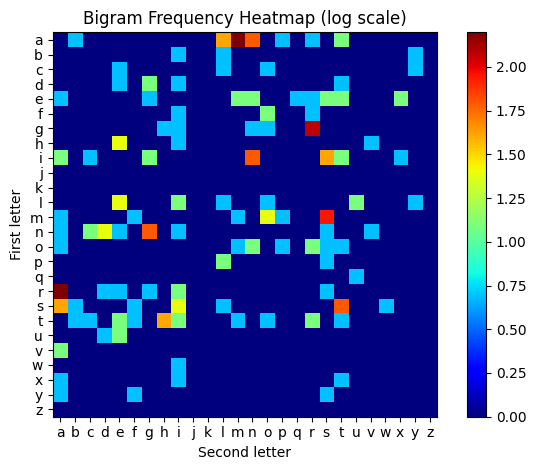


--- Analyzing 3-grams ---


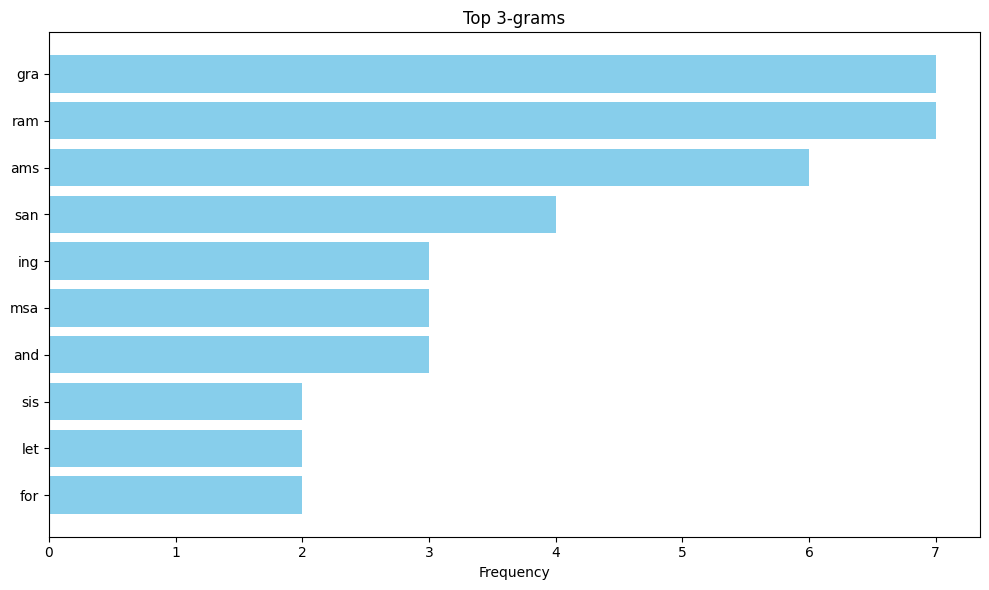

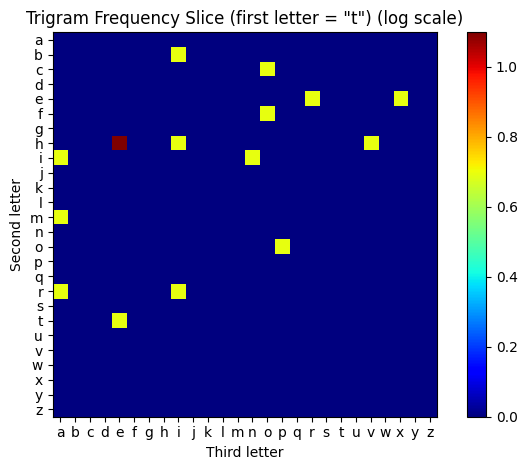


--- Analyzing 4-grams ---


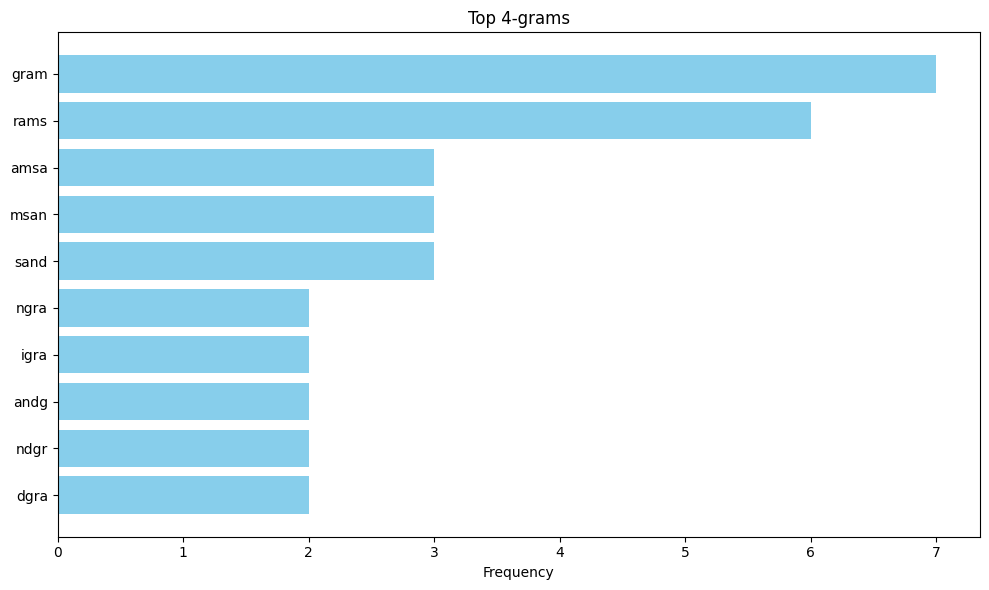

Frequency matrix shape for 4-grams: (26, 26, 26, 26)


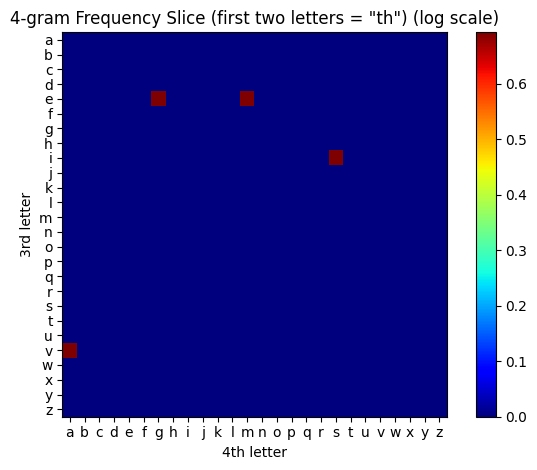


--- Analyzing 5-grams ---


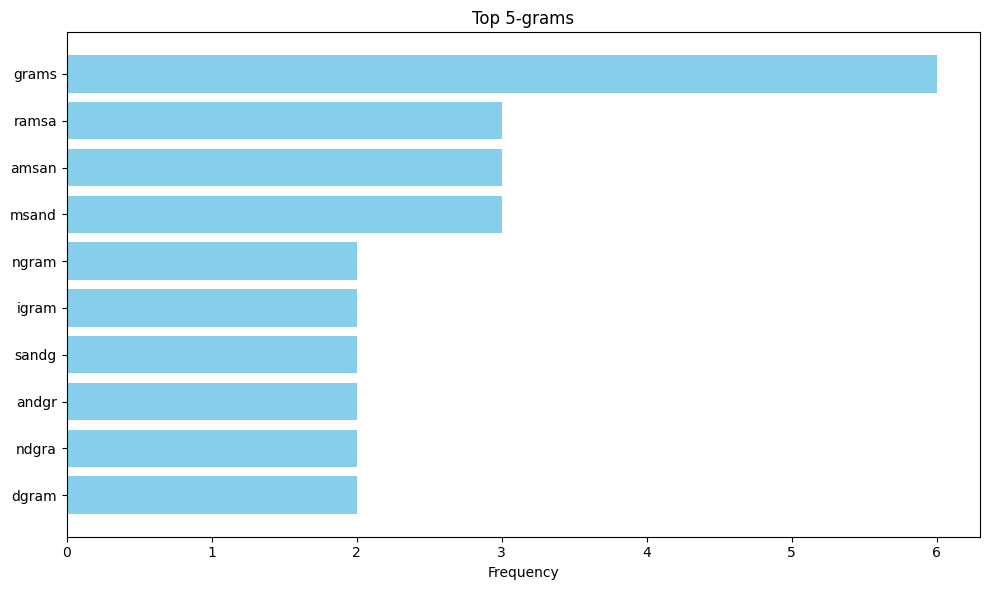

Frequency matrix shape for 5-grams: (26, 26, 26, 26, 26)


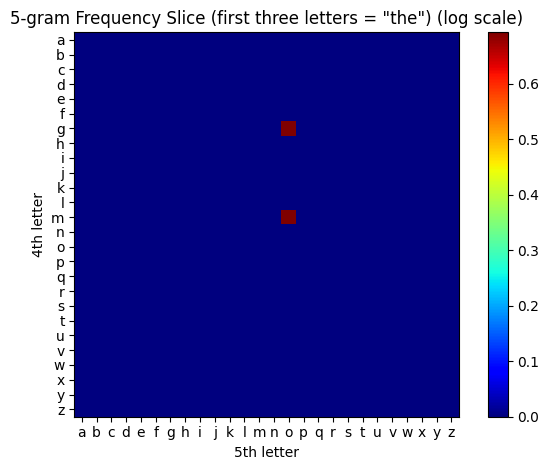

In [50]:
#  Main analysis on sample text

sample_text = ("This is an example text for demonstrating ngram frequency analysis "
               "with variable n values. The goal is to plot bigrams, trigrams, and "
               "the most common 4-grams and 5-grams, including heatmap slices for 4-grams "
               "and 5-grams by fixing initial letters.")

for n in [2, 3, 4, 5]:
    print(f"\n--- Analyzing {n}-grams ---")
    ngrams = generate_ngrams(sample_text, n)
    ngram_freq = count_ngrams(ngrams)
    freq_matrix = ngram_frequency_matrix(ngram_freq, n)

    plot_top_ngrams_bar(ngram_freq, top=10, title=f"Top {n}-grams")

    if n == 2:
        plot_bigram_heatmap(freq_matrix)
    elif n == 3:
        plot_trigram_slice(freq_matrix, fixed_letter='t')
    elif n == 4:
        print(f"Frequency matrix shape for 4-grams: {freq_matrix.shape}")
        plot_4gram_slice(freq_matrix, fixed_letters='th')
    elif n == 5:
        print(f"Frequency matrix shape for 5-grams: {freq_matrix.shape}")
        plot_5gram_slice(freq_matrix, fixed_letters='the')


# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [ ]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Extract a subset of the data for our experiment:

In [ ]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

In [ ]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [ ]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

In [ ]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [ ]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

In [ ]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [ ]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

In [ ]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [ ]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together?

In [ ]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [ ]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

### 1. **Which is the best combination of features?**

There's no single "best" combination—it depends on how well the features help us tell the classes apart.

To find the most effective set:
- Try training a simple model like Logistic Regression or k-NN using different combinations.
- Use cross-validation to compare how each combo performs.
- You can also use tools like PCA (for visualizing or reducing dimensions) or feature selection methods like RFE (Recursive Feature Elimination) to guide your choices.

---

### 2. **How would you test or visualize four or more features?**

- **Pairwise scatter plots**: Use `seaborn.pairplot()` to visualize 2D projections of all feature pairs.
- **3D plots**: Use `matplotlib`'s `Axes3D` to view three features at once.
- **T-SNE / UMAP**: Use dimensionality reduction to project high-dimensional features to 2D or 3D for visualization.
- **Parallel Coordinates Plot**: Visualize all features simultaneously with this multivariate technique.

---

### 3. **Can you come up with your own features?**

Yes! Some ideas:
- **Symmetry**: Horizontal or vertical symmetry of the digit.
- **Stroke density**: Number of non-zero pixels or average pixel intensity.
- **Centroid**: Center of mass of the digit pixels.
- **Moments**: Central moments or Hu moments.
- **Aspect ratio**: Ratio of width to height of the bounding box of the digit.

---

### 4. **Will these features work for different classes other than 0 and 1?**

Not necessarily. If the features were engineered to distinguish 0 vs 1 (e.g., based on loop structure), they might not generalize well to other digits (e.g., 3 vs 8).

**To test generalization:**
- Evaluate features on multiple binary class combinations.
- Ensure the features capture general properties of digits, not just class-specific quirks.

---

### 5. **What happens if we use more than two classes at a time?**

It gets a bit more complicated. The features you chose might not clearly separate all the classes anymore.

Here are a few things to keep in mind:
- You’ll need a model that can handle many classes at once, like softmax regression, decision trees, or multi-class SVM.
- Features that worked well for just two classes might not work as well when more classes are added.
- You might need to create or choose new features that help tell all the classes apart—not just two of them.
